<a href="https://colab.research.google.com/github/ahamedistiaque/Telecom_Churn_analysis/blob/main/Telecom_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score,accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix


pd.options.display.max_columns =25

# to remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

sns.set_context("talk")
sns.set_style("darkgrid")

In [167]:
path='/content/drive/MyDrive/Colab Notebooks/Data Processing for Machine Learning With Python/Churn.csv'

In [168]:
df=pd.read_csv(path)
display(df.sample(5))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
603,53,0,57.5,265.5,244.3,11.6,3,no,no,no,95,9.78,131,22.57,128,10.99,6,3.13,MI,415,346-5707
2466,83,38,107.9,140.4,253.6,10.5,0,no,no,yes,90,18.34,94,11.93,79,11.41,2,2.84,MD,408,404-5057
863,45,0,207.6,152.7,217.8,12.4,1,no,no,no,71,35.29,94,12.98,125,9.80,13,3.35,MO,408,385-8406
3021,57,0,85.9,193.9,231.5,10.1,0,no,no,no,92,14.60,127,16.48,93,10.42,2,2.73,CO,415,342-4004
1942,42,0,184.5,200.5,279.2,8.8,2,no,no,no,98,31.37,93,17.04,91,12.56,3,2.38,MO,415,410-5250


In [169]:
print("Number of rows",df.shape[0])
print("Number of columns",df.shape[1])

Number of rows 3333
Number of columns 21


In [170]:
# check for the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [171]:
# Data statistics
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [172]:
df.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

In [173]:
# Missing values in the dataset
df.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

In [174]:
df.Churn.value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [175]:
df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))


In [176]:
df.sample(5)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
3240,34,0,180.6,280.4,292.4,5.0,1,0,0,0,65,30.70,99,23.83,105,13.16,3,1.35,SD,408,392-5716
671,3,36,118.1,221.5,103.9,11.9,2,0,0,1,117,20.08,125,18.83,89,4.68,6,3.21,CT,415,401-6162
100,98,21,161.2,252.2,160.2,4.4,4,0,0,1,114,27.40,83,21.44,92,7.21,8,1.19,IA,510,379-6506
1146,161,0,151.6,219.4,224.7,4.0,1,0,0,0,117,25.77,87,18.65,68,10.11,5,1.08,WA,415,378-8137
56,141,0,126.9,180.0,140.8,8.0,1,0,0,0,98,21.57,62,15.30,128,6.34,2,2.16,CO,415,340-5121


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [178]:
df.corr()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.024735,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.008745,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,0.049396,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.019100,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,-0.028905,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239,0.045871,-0.001318,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750,-0.024522,-0.017824,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Churn,0.016541,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000,0.259852,-0.102148,0.018459,0.205151,0.009233,0.092786,0.006141,0.035496,-0.052844,0.068259,0.006174
Intl_Plan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852,1.000000,0.006006,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048551
Vmail_Plan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,-0.102148,0.006006,1.000000,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,-0.000747


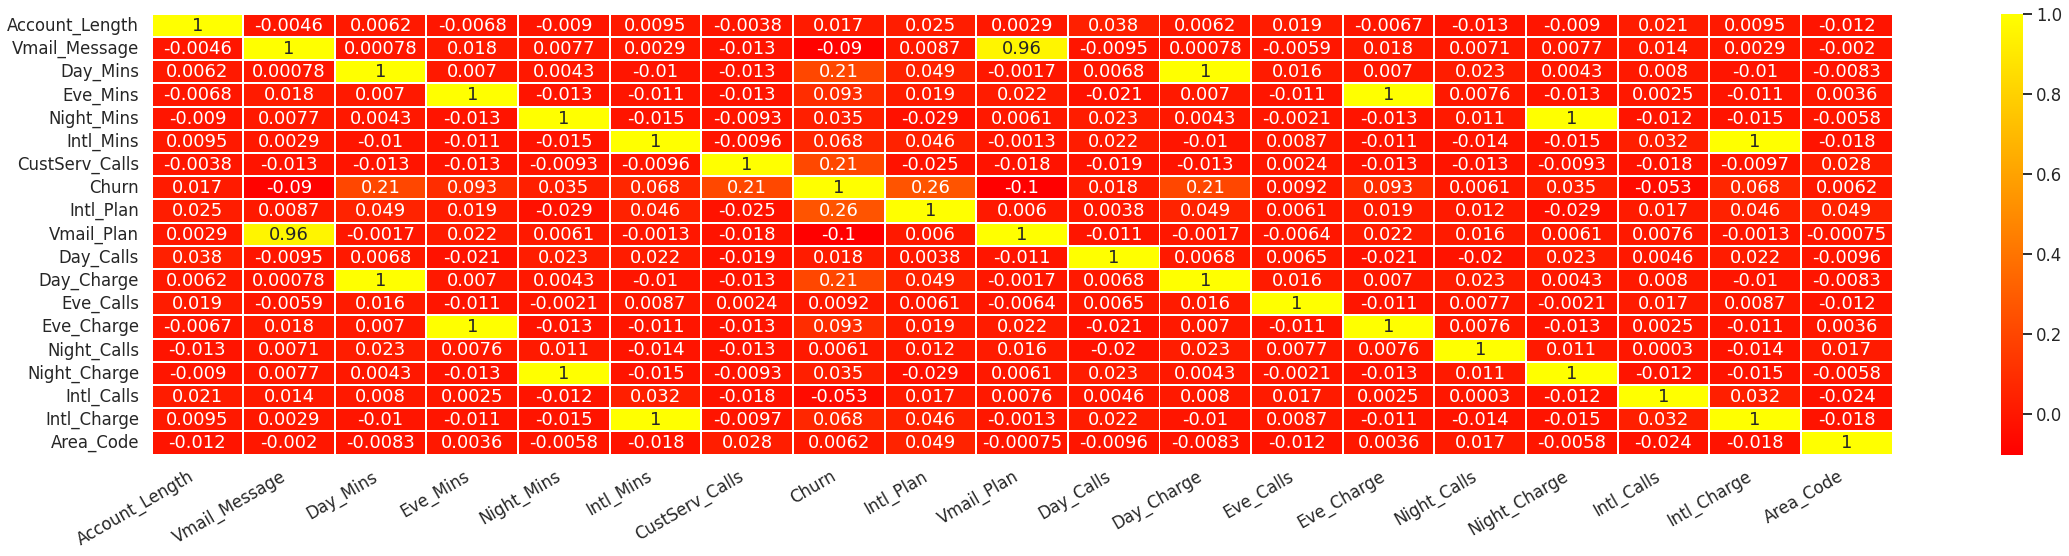

In [179]:
plt.figure(figsize=(39,9))
sns.heatmap(df.corr(),annot=True,cmap='autumn',linewidths=1,fmt='0.2g')
plt.xticks(rotation='horizontal')
plt.gcf().autofmt_xdate()

In [180]:
df=df.drop(['Area_Code','Phone','State'],axis=1)


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#**Encoding**

### **Data train for ML**

In [182]:
df['Churn'].value_counts()


0    2850
1     483
Name: Churn, dtype: int64

In [183]:
X = df.drop(['Churn'],axis=1)
y =df[['Churn']]


print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)

Shape of X =  (3333, 17)
Shape of y =  (3333, 1)


### Split train and test set


In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, 
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 17) (667, 17) (2666, 1) (667, 1)


**Find the ratio of yes/no**

In [185]:
y_train["Churn"].value_counts(normalize=True)*100

0    85.52138
1    14.47862
Name: Churn, dtype: float64

In [186]:
y_test["Churn"].value_counts(normalize=True)*100

0    85.457271
1    14.542729
Name: Churn, dtype: float64

### **Applied Linear Regression Model**

In [187]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [188]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [189]:
y_test

,Churn
601,1
2050,0
3200,0
1953,0
1119,0
...,...
2649,0
1763,0
950,0
1652,0


In [190]:
model.predict_proba(X_test)[:,1]

array([0.1184338 , 0.10588755, 0.04836865, 0.04238148, 0.17487881,
       0.07160762, 0.31904184, 0.13501022, 0.04381385, 0.08857875,
       0.02442341, 0.04425614, 0.42515848, 0.34837483, 0.26005559,
       0.16127041, 0.03879577, 0.10332651, 0.01949081, 0.15517652,
       0.05766022, 0.05466587, 0.10379572, 0.33699787, 0.02787447,
       0.03182899, 0.12924245, 0.2928105 , 0.15014594, 0.02580701,
       0.07831073, 0.05166317, 0.0927975 , 0.03686726, 0.0682567 ,
       0.08148627, 0.02721368, 0.03791241, 0.08274984, 0.13330692,
       0.04033142, 0.34255253, 0.21090732, 0.04380999, 0.34502066,
       0.29146833, 0.16557585, 0.08571027, 0.35085912, 0.14775689,
       0.32563626, 0.23012242, 0.08228489, 0.07408717, 0.31825623,
       0.25148185, 0.24438564, 0.11718234, 0.06771932, 0.15723436,
       0.14241642, 0.14579689, 0.06016981, 0.34571665, 0.14448941,
       0.31084417, 0.02784513, 0.01965856, 0.07427345, 0.15948831,
       0.07299817, 0.09112797, 0.32421635, 0.31364705, 0.01701

In [191]:
y_test["Churn_probability"] = np.round(model.predict_proba(X_test)[:,1],2)
y_test["Predicted_Data"]=y_pred
y_test

,Churn,Churn_probability,Predicted_Data
601,1,0.12,0
2050,0,0.11,0
3200,0,0.05,0
1953,0,0.04,0
1119,0,0.17,0
...,...,...,...
2649,0,0.12,0
1763,0,0.06,0
950,0,0.06,0
1652,0,0.09,0


***Confusion Matrix***

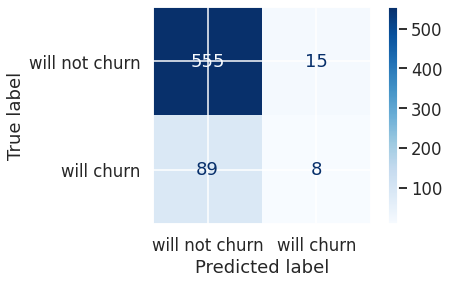

In [192]:
plot_confusion_matrix(model,
                      X_test,
                      y_test["Churn"],
                      display_labels = ["will not churn", "will churn"],
                      cmap = "Blues")

plt.show()

In [193]:
confusion_matrix_ = confusion_matrix(y_test["Churn"],
                                     y_test["Predicted_Data"])
print(confusion_matrix_)

[[555  15]
 [ 89   8]]


In [194]:
# True/False---Positive/Negative
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  555
False Negatives =  89
False Positives =  15
True Positives =  8


Accuracy

In [195]:
accuracy = (TN+TP)/(TN+TP+FP+FN)
print(accuracy)

0.8440779610194903


### **Find Prediction Error**


**Precision, Recall/Sensitivity/True Positive Rate, F1 score**


In [198]:
precision_ = np.round(precision_score(y_test['Churn'], 
                                      y_test['Predicted_Data']), 2)
recall_ = np.round(recall_score(y_test['Churn'], 
                                y_test['Predicted_Data']), 2)

f1_score__ = np.round(f1_score(y_test['Churn'], 
                               y_test['Predicted_Data']), 2)

print("Precision = ", precision_) # Result near 1 is beeter
print("Recall = ", recall_)  # Result near 1 is beeter
print("f1_score = ", f1_score__)  # Result near 1 is beeter

Precision =  0.35
Recall =  0.08
f1_score =  0.13


In [197]:
classification_report_ = classification_report(y_test["Churn"],
                                               y_test["Predicted_Data"])
print(classification_report_)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       570
           1       0.35      0.08      0.13        97

    accuracy                           0.84       667
   macro avg       0.60      0.53      0.52       667
weighted avg       0.79      0.84      0.80       667

